# Logistic regression
##### 2333084 梁潇怡

## Dataset
In this assignment, I used the IRIS dataset from the UCI Machine Learning Repository. According to the official introduction, the dataset includes 4 attributes and 3 labels.

Attribute Information:

1. Sepal length in cm
2. Sepal width in cm
3. Petal length in cm
4. Petal width in cm
5. class:
      --Iris Setosa
      --Iris Versicour
      --Iris Virginia

Due to the inclusion of three types of labels, in this assignment, one label was manually removed to match the binary dataset, and then the seanborn library was used to visualize the dataset to visually determine if there were any issues. 

According to the visualization image, we can see that there are some obvious outliers in the measurement that may be incorrect, such as sepal_width has one or two points deviate from normal values, which may affect training. At the same time, sepal_width is not as distinct as the other three attributes, so it is considered to remove this attribute in model training and prediction.

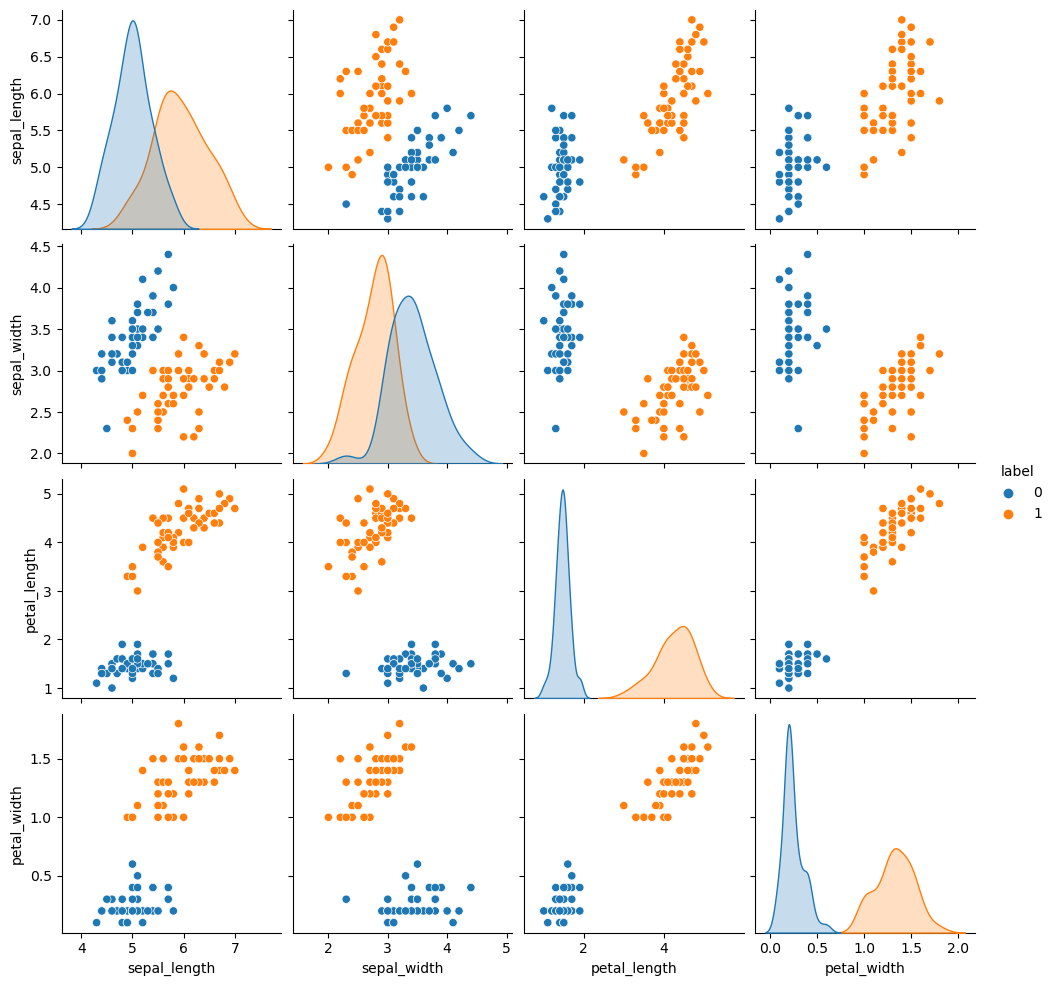

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('./iris/iris.data',sep=',')
data.columns=['sepal_length','sepal_width','petal_length','petal_width',"label"]
data.label = pd.factorize(data['label'])[0]
data = data[data.label != 2]
g=sns.pairplot(data, hue='label')
plt.show()


In [39]:
# set seed
seed = 42
np.random.seed(seed)

data = data.to_numpy()

data = np.delete(data,1,1)
colums = ['sepal_length','petal_length','petal_width',"label"]

## Logist Regression Model
In this assignment, I completed two methods of logistic regression models, namely using gradient descent method and Newton method.


For logistic regression:
Estimate w and b using maximum likelihood method
Given a training set ${𝒙_𝑖,𝑦_𝑖 }_(𝑖=1)^𝑚$, the likelihood is then

$$
\begin{aligned}
\ell(\boldsymbol{w}, b) & =\ln \left(\prod_{i=1}^m p_1\left(\boldsymbol{x}_i \mid \boldsymbol{w}, b\right)^{y_i} p_0\left(\boldsymbol{x}_i \mid \boldsymbol{w}, b\right)^{1-y_i}\right) \\
& =\sum_{i=1}^m\left[y_i \ln p_1\left(\boldsymbol{x}_i \mid \boldsymbol{w}, b\right)+\left(1-y_i\right) \ln p_0\left(\boldsymbol{x}_i \mid \boldsymbol{w}, b\right)\right]
\end{aligned}
$$

Let 𝜷=(𝒘;𝑏),𝒙 ̂=(𝒙;1), then
$$
\begin{gathered}
\boldsymbol{w}^T \boldsymbol{x}+b=\boldsymbol{\beta}^T \widehat{\boldsymbol{x}} \\
p_1\left(\widehat{\boldsymbol{x}}_i\right)=\frac{e^{\boldsymbol{\beta}^T \widehat{\boldsymbol{x}}_i}}{1+e^{\boldsymbol{\beta}^T \widehat{\boldsymbol{x}}_i}}, p_0\left(\widehat{\boldsymbol{x}}_i\right)=\frac{1}{1+e^{\boldsymbol{\beta}^T \widehat{\boldsymbol{x}}_i}}
\end{gathered}
$$

$$\left.\ell(\boldsymbol{w}, b)=\ell(\boldsymbol{\beta})=\sum_i^m\left[y_i \boldsymbol{\beta}^T \widehat{\boldsymbol{x}}_i-\ln \left(1+e^{\boldsymbol{\beta}^T \widehat{\boldsymbol{x}}_i}\right)\right)\right]$$

So the target function of optimization can be written as

$$
\boldsymbol{\beta}^*=\arg \min _{\boldsymbol{\beta}}-\ell(\boldsymbol{\beta})
$$

The minimum value of the target function can be calculated using gradient descent method or Newton’s method
Using Newton’s method, in t+1 iteration, 

### Newtown's method

$$
\boldsymbol{\beta}^{t+1}=\boldsymbol{\beta}^t-\alpha\left(\frac{\partial^2 \ell(\boldsymbol{\beta})}{\partial \boldsymbol{\beta} \partial \boldsymbol{\beta}^T}\right)^{-1} \frac{\partial \ell(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}}
$$
 

where $\frac{\partial^{2} \ell(\boldsymbol{\beta})}{\partial \boldsymbol{\beta} \partial \boldsymbol{\beta}^{T}}$  (denoted by $\boldsymbol{H}(\boldsymbol{\beta})$) is the hessian matrix of matrix $\boldsymbol{\beta}$ and $\frac{\partial \ell(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}}$ (denoted by $\boldsymbol{dJ}(\boldsymbol{\beta})$) is the gradient of matrix $\boldsymbol{\beta}$.

The calculation of $\boldsymbol{H}(\boldsymbol{\beta})^{-1}\boldsymbol{dJ}(\boldsymbol{\beta})$ can be substituted by solving a linear matrix equation $\boldsymbol{H}(\boldsymbol{\beta})\boldsymbol{X} = \boldsymbol{dJ}(\boldsymbol{\beta})$.

So, if the model is set to be trained in newtown's method, it will use this code to update theta, while lr is the learning rate defined by user.

```python
try:
    self._theta -= np.linalg.solve(hessian, grad) * self.lr
except np.linalg.LinAlgError:
    break
```

### Gradient Descent Method


$$
\boldsymbol{\beta}^{t+1}=\boldsymbol{\beta}^t-\alpha \frac{\partial \ell(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}}
$$


where  $\frac{\partial \ell(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}}$ (denoted by $\boldsymbol{dJ}(\boldsymbol{\beta})$) is the gradient of matrix $\boldsymbol{\beta}$.

We could simplify the $\boldsymbol{dJ}$ to the following formula.

$$
\frac{\partial J(\beta)}{\partial \beta_j}=-\sum_{i=1}^n\left(y_i-f\left(x_i \beta\right)\right) \cdot x_{i j}=\sum_{i=1}^n\left(\frac{1}{1+e^{-x_i \beta}}-y_i\right) \cdot x_{i j}
$$

So that we could calculate the grad easily using the code.
```python
def dJ(self, theta, x_w, y_train):
        y_hat = self._sigmoid(x_w @ theta)
        return(y_hat - y_train) @ x_w
```

## Model

In the following model, init function defines the learning rate, threshold, and the training method. The predict function will calculate the probality for the testing data to be a postive sample. The classify function will classfiy the samples by threshold and probality.


In [40]:
class LogistRegression:
    def __init__(self, lr, max_iter, threshold, method):
        self.lr = lr
        self.max_itr = max_iter
        self.threshold =threshold
        self.method = method
        
    def _sigmoid(self, z):
        return 1. / (1. + np.exp(-z))
    
    # def J(self, theta, x_w, y_train):
    #     y_hat = self._sigmoid(x_w @ theta)
    #     return -(y_train*np.log(y_hat) + (1-y_train)*np.log(1-y_hat))
        
    def dJ(self, theta, x_w, y_train):
        y_hat = self._sigmoid(x_w @ theta)
        return(y_hat - y_train) @ x_w
    
    def hessian(self, x_w, y_train):
        y_hat = self._sigmoid(x_w @ self._theta)
        return x_w.T * y_hat * (1-y_hat) @ x_w
    
    def fit(self,x_train, y_train):
        if self.method == "newtown":
            self.newtown(x_train, y_train)
        elif self.method == "grad":
            self.grad(x_train, y_train)
        else:
            return None
    
    def newtown(self,x_train,y_train):
        x_w = np.hstack([np.ones((len(x_train), 1)), x_train])
        self._theta = np.zeros(x_w.shape[1])
        for _ in range(self.max_itr):
            pre_theta = self._theta
            grad = self.dJ(self._theta,x_w,y_train)
            hessian = self.hessian(x_w,y_train)
            try:
                self._theta -= np.linalg.solve(hessian, grad) * self.lr
            except np.linalg.LinAlgError:
                break
            if np.allclose(self._theta, pre_theta):
                break
    
    def grad(self,x_train,y_train):
        x_w = np.hstack([np.ones((len(x_train), 1)), x_train])
        self._theta = np.zeros(x_w.shape[1])
        for _ in range(self.max_itr):
            pre_theta = self._theta
            grad = self.dJ(self._theta,x_w,y_train)
            self._theta = self._theta - self.lr * grad
            if np.allclose(self._theta, pre_theta):
                break

            
    def predict(self,x_test):
        x_w = np.hstack([np.ones((len(x_test), 1)), x_test])
        y_pred = self._sigmoid(x_w.dot(self._theta))
        return y_pred
    
    def classify(self,x_test):
        x_w = np.hstack([np.ones((len(x_test), 1)), x_test])
        y_pred = self._sigmoid(x_w.dot(self._theta))
        y_pred = np.array(y_pred >= self.threshold , dtype = 'int')
        return y_pred


## Evaluate
In the training, I split the data into test data and training data, while the test size is 0.4. While for the model, I define the learning rate is 0.01 and the max iters is 1000, threshold is 0.5.

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data[:,:3], data[:,-1], test_size=0.4)

### ROC Curve

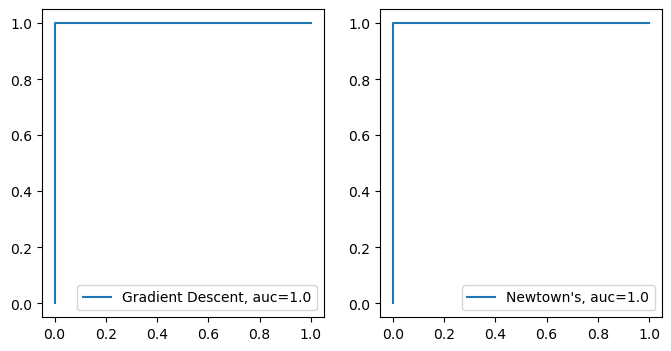

In [42]:
from sklearn import metrics
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))

model = LogistRegression(lr=0.1, max_iter=1000, threshold=0.5, method='newtown')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.subplot(1, 2, 1)
plt.plot(fpr,tpr,label="Gradient Descent, auc="+str(auc))
plt.legend(loc=4)

model = LogistRegression(lr=0.01, max_iter=1000, threshold=0.5, method='grad')
model.fit(x_train, y_train)
y_pred = model.classify(x_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.subplot(1,2, 2)
plt.plot(fpr,tpr,label="Newtown's, auc="+str(auc))
plt.legend(loc=4)
plt.show()


### Decision Boundary

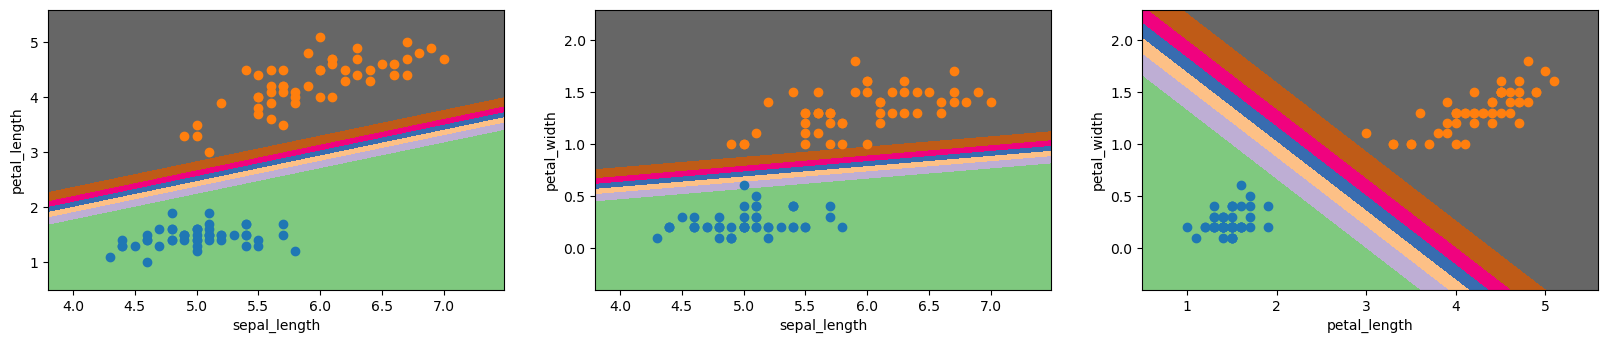

In [53]:
from itertools import combinations

x = data[:,:-1]
y = data[:,-1]

plt.figure(figsize=(20, 8))

for index, (i, j) in enumerate(combinations(range(3),2)):
    model = LogistRegression(lr=0.01, max_iter=1000, threshold=0.5, method='grad')
    model.fit(np.c_[x[:, i], x[:, j]],y)

    h = .01
    feature_1, feature_2 = np.meshgrid(
        np.arange(x[:, i].min()-0.5, x[:, i].max()+0.5,h),
        np.arange(x[:, j].min()-0.5, x[:, j].max()+0.5,h))
    
    pred = model.predict(np.c_[feature_1.ravel(), feature_2.ravel()])
    pred = pred.reshape(feature_1.shape)
    plt.subplot(2, 3, index+1)

    plt.contourf(feature_1, feature_2, pred, cmap=plt.cm.Accent)
    for class_value in range(2):
        row_ix = np.where(y == class_value)
        plt.scatter(x[row_ix, i], x[row_ix, j], cmap=plt.cm.Accent)
    plt.xlabel(colums[i])
    plt.ylabel(colums[j])
plt.show()

## Improvement
This model only implements binary classification and should be applied to more classifications.

## How to Run
you need to prepare python enviroment and install:
- sklearn
- numpy
- matplotlib
- pandas
- seaborn
then click the run all.